In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
# Load dataset
df = pd.read_csv('Dataset\Customer Churn.csv')  # Replace with your dataset file

# General overview
print("Dataset Overview:")
print(df.info())
print("\nMissing Values Count:\n", df.isnull().sum())

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe(include='all'))

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: flo

In [14]:
# Handle missing values
imputer = SimpleImputer(strategy="mean")
df.iloc[:, :] = imputer.fit_transform(df)

In [15]:
# Convert target variable (Churn) to integer if not already
df['Churn'] = df['Churn'].astype(int)

# 1. Basic EDA
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
       Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count   3.150000e+03  3150.000000          3.150000e+03    3.150000e+03   
mean    3.609106e-17     0.076508          1.985008e-16    9.022765e-18   
std     1.000159e+00     0.265851          1.000159e+00    1.000159e+00   
min    -1.050285e+00     0.000000         -3.446277e+00   -6.199620e-01   
25%    -9.125954e-01     0.000000         -2.965316e-01   -6.199620e-01   
50%    -2.241493e-01     0.000000          2.867546e-01   -6.199620e-01   
75%     6.019860e-01     0.000000          6.367263e-01    3.757346e-02   
max     3.906527e+00     1.000000          1.686642e+00    5.955393e+00   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count    3.150000e+03       3150.000000       3150.000000   
mean    -1.127846e-16         69.460635         73.174921   
std      1.000159e+00         57.413308        112.237560   
min     -1.065571e+00          0.000000          0.0

C:\Users\rishe\AppData\Local\Temp\ipykernel_2324\3620798599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


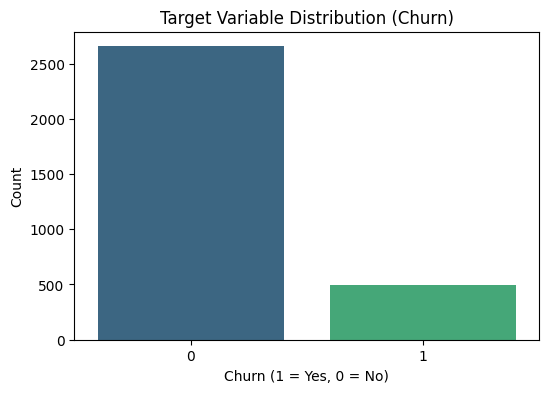

In [16]:
# Visualizing target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title("Target Variable Distribution (Churn)")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

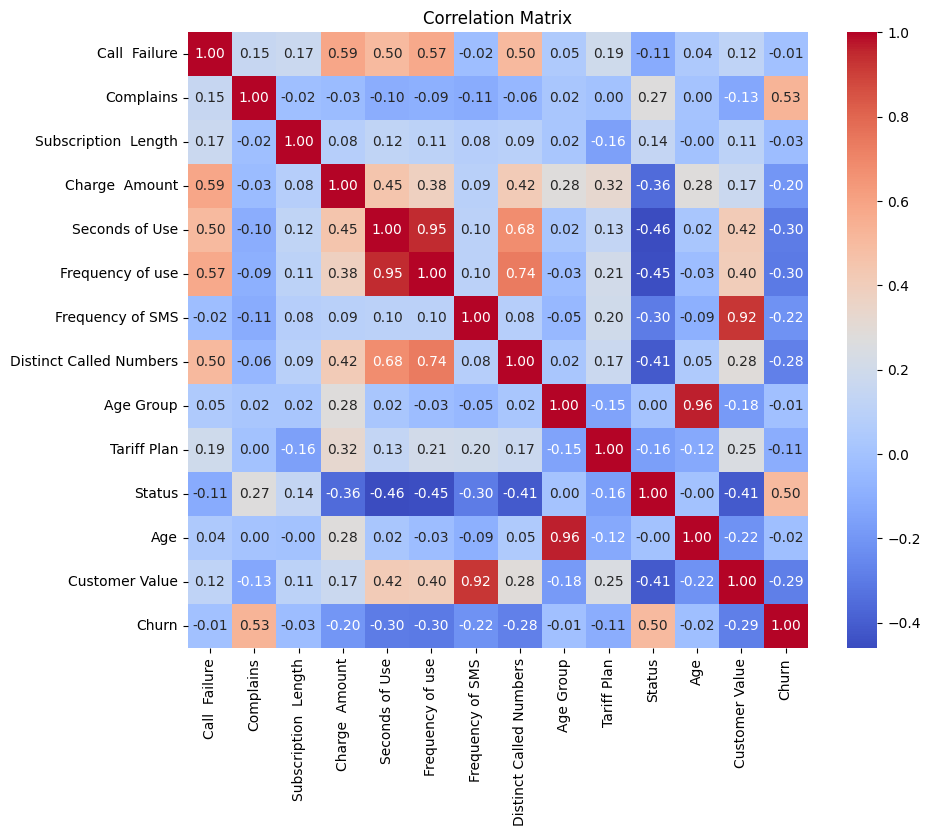

In [17]:
# 2. Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
# 3. Feature Engineering: PCA and Feature Selection
X = df.drop(columns=['Churn'])
y = df['Churn']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("\n--- PCA Explained Variance Ratio ---")
print(pca.explained_variance_ratio_)


--- PCA Explained Variance Ratio ---
[0.30904449 0.17841786]


In [23]:
# Adding a constant to make sure the dataset is non-negative
X_non_negative = X + abs(X.min())  # Shift all values to non-negative range

# Now apply SelectKBest with chi-squared
selector = SelectKBest(score_func=chi2, k=5)
X_selected = selector.fit_transform(X_non_negative, y)
selected_features = X.columns[selector.get_support()]
print("\n--- Selected Features Using Chi-Squared ---")
print(selected_features)



# 4. Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Model Evaluation
print("\n--- Model Performance ---")
print(classification_report(y_test, y_pred))


--- Selected Features Using Chi-Squared ---
Index(['Complains', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Customer Value'],
      dtype='object')

--- Model Performance ---
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       520
           1       0.84      0.80      0.82       110

    accuracy                           0.94       630
   macro avg       0.90      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630



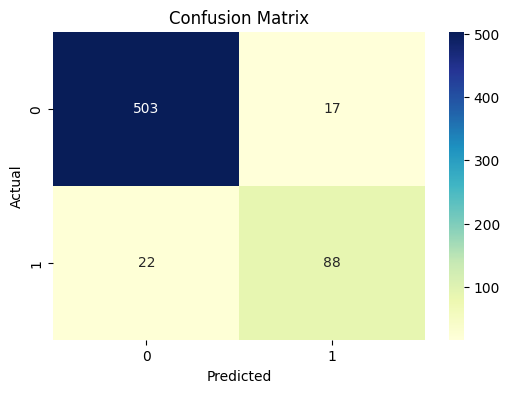

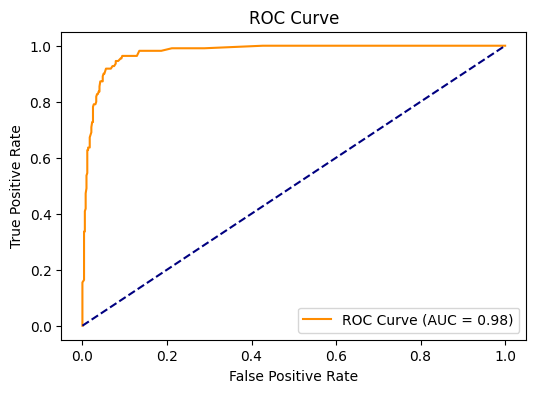

C:\Users\rishe\AppData\Local\Temp\ipykernel_2324\4180228023.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="coolwarm")


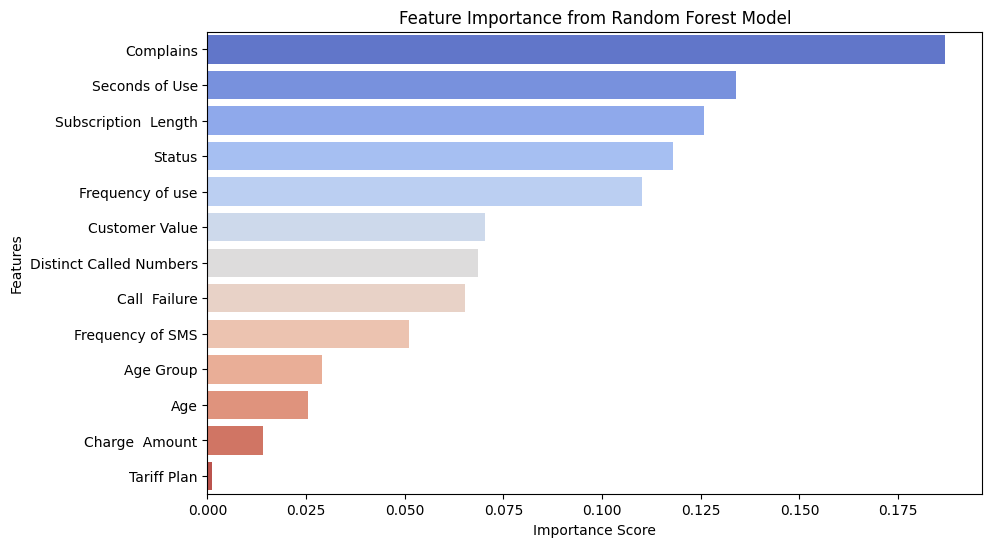

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="navy")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 6. Feature Importance Visualization
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="coolwarm")
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [25]:
# 7. High-Risk Customer Analysis
threshold_call_failure = df['Call  Failure'].mean()
high_risk_customers = df[(df['Call  Failure'] > threshold_call_failure) & (df['Complains'] == 1)]
print(f"\nHigh-Risk Customers Count: {len(high_risk_customers)}")
print(f"High-Risk Churn Rate: {high_risk_customers['Churn'].mean() * 100:.2f}%")

# 8. Export Results for Further Reporting
feature_importances.to_csv("feature_importances.csv", index=False)
high_risk_customers.to_csv("high_risk_customers.csv", index=False)


High-Risk Customers Count: 145
High-Risk Churn Rate: 75.17%


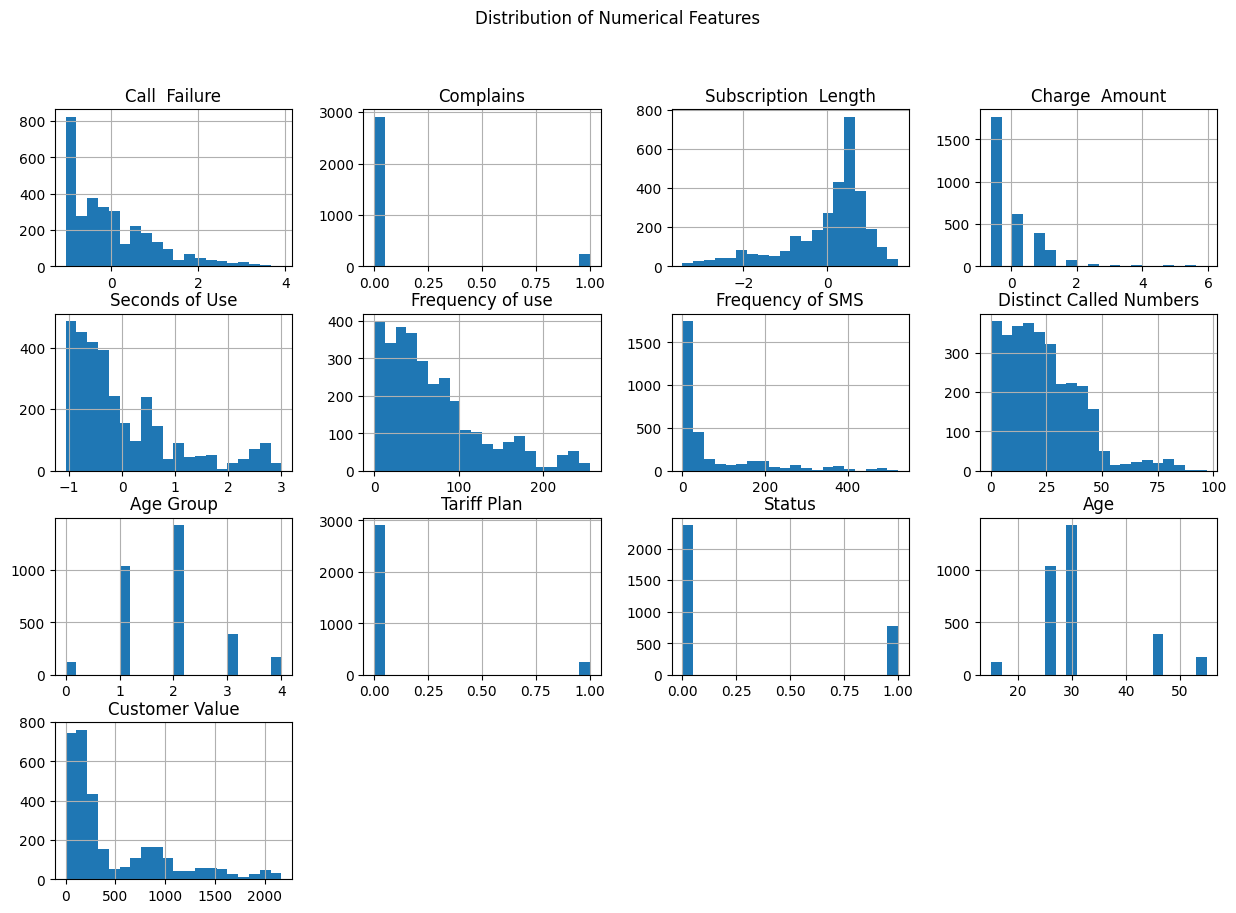

<Figure size 1000x600 with 0 Axes>

In [26]:
# 1. **Distribution of Features**

# Distribution of numerical variables
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Distribution of categorical variables
categorical_features = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(10, 6))
for col in categorical_features:
    plt.subplot(2, 3, categorical_features.get_loc(col) + 1)
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

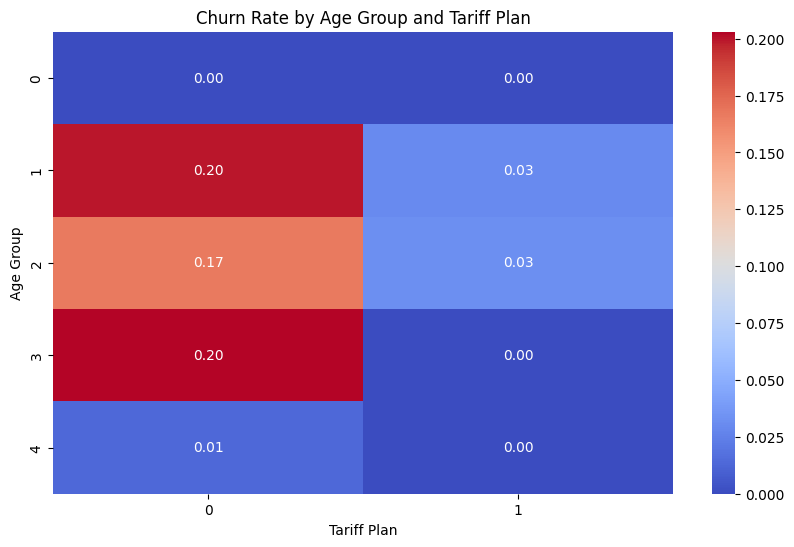


--- Chi-Squared Test (Tariff Plan vs Churn) ---
Chi-Squared Stat: 34.21761003954184, P-value: 4.928097701198338e-09

--- ANOVA Test (Age Group vs Churn) ---
F-statistic: 14.996245168285425, P-value: 3.805460464570242e-12


In [27]:
# Grouping Churn by multiple categorical features
grouped_churn = df.groupby(['Age Group', 'Tariff Plan'])['Churn'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_churn, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Churn Rate by Age Group and Tariff Plan")
plt.show()

# Hypothesis Testing: Check if Churn varies by Tariff Plan
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Tariff Plan'], df['Churn'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"\n--- Chi-Squared Test (Tariff Plan vs Churn) ---")
print(f"Chi-Squared Stat: {chi2_stat}, P-value: {p_val}")

# Hypothesis Testing: Compare Churn by Age Group using ANOVA
from scipy.stats import f_oneway
age_group_churn = [df[df['Age Group'] == age]['Churn'] for age in df['Age Group'].unique()]
anova_stat, p_value = f_oneway(*age_group_churn)
print(f"\n--- ANOVA Test (Age Group vs Churn) ---")
print(f"F-statistic: {anova_stat}, P-value: {p_value}")
